In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pytoolsMH as ptMH
import pandas as pd
import seaborn as sns
import os,sys
import scipy.io
import scipy.stats as ss
from pathlib import Path
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_style('whitegrid')

sys.path.append('../src')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)

mpl.rc('pdf', fonttype=42) # embed fonts on pdf output 

r_ = np.r_

In [3]:
dataDir = Path('../coronavirus-tracking-DC-area/NYT-data').resolve()
states = pd.read_csv(dataDir/'us-states.csv')

In [4]:
MD = states[states['state'] == "Maryland"]
DC = states[states['state'] == "District of Columbia"]
VA = states[states['state'] == "Virginia"]
NY = states[states['state'] == "New York"]

In [5]:
def resetDeathDays(df):
    df = df[df['deaths']!= 0]
    df = df.reset_index(drop = True)
    df = df.reset_index()
    df = df.rename(columns={"index": "deathDays"})
    return df
def resetCaseDays(df):
    df = df[df['cases']!= 0]
    df = df.reset_index(drop = True)
    df = df.reset_index()
    df = df.rename(columns={"index": "caseDays"})
    return df

In [6]:
MDd = resetDeathDays(MD)
DCd = resetDeathDays(DC)
VAd = resetDeathDays(VA)
NYd = resetDeathDays(NY)

In [7]:
DMVd = pd.concat([MDd, DCd, VAd])

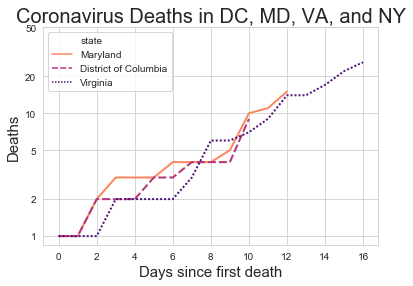

In [8]:
sns.lineplot(x = 'deathDays', y = 'deaths', data = DMVd, hue = 'state', 
             palette = 'magma_r', style = 'state', lw = 2)
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50], 
           [1, 2, 5, 10, 20, 50], fontsize = 10)
plt.ylabel('Deaths', fontsize = 15)
plt.xlabel('Days since first death', fontsize = 15)
plt.title('Coronavirus Deaths in DC, MD, VA, and NY', fontsize = 20)
plt.legend(fontsize = 10)

In [9]:
MDc = resetCaseDays(MD)
DCc = resetCaseDays(DC)
VAc = resetCaseDays(VA)
NYc = resetCaseDays(NY)

In [10]:
DMVc = pd.concat([MDc, DCc, VAc])

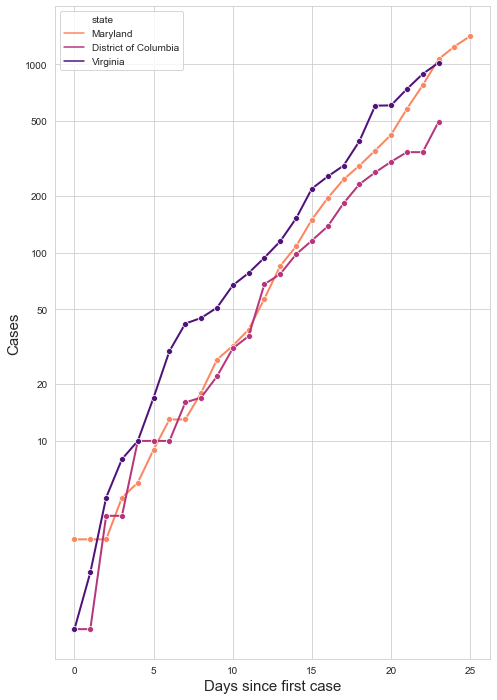

In [11]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=r_[1.3,2]*6)

sns.lineplot(x = 'caseDays', y = 'cases', data = DMVc, hue = 'state', 
             palette = 'magma_r', lw = 2, ms=12, marker='.', ls='-')
plt.yscale('log')
v0 = r_[1,2,5,10]
yt = np.setdiff1d(np.unique(np.hstack((v0,v0*10,v0*100))), [1,2,5])
plt.yticks(yt, yt, fontsize = 10)
plt.ylabel('Cases', fontsize = 15)
plt.xlabel('Days since first case', fontsize = 15)
#plt.title('Coronavirus Deaths in DC, MD, VA, and NY', fontsize = 20)
plt.legend(fontsize = 10)


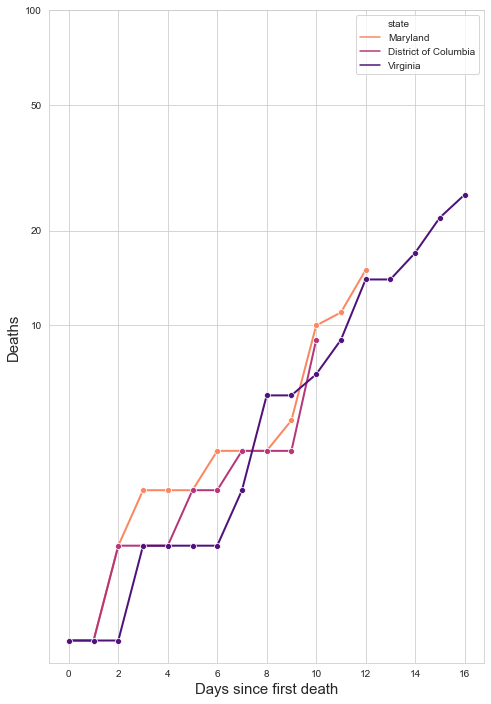

In [12]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=r_[1.3,2]*6)

sns.lineplot(x = 'deathDays', y = 'deaths', data = DMVd, hue = 'state', 
             palette = 'magma_r', lw = 2, ms=12, marker='.', ls='-')
plt.yscale('log')
v0 = r_[1,2,5,10]
yt = np.setdiff1d(np.unique(np.hstack((v0,v0*10))), [1,2,5])
plt.yticks(yt, yt, fontsize = 10)
plt.ylabel('Deaths', fontsize = 15)
plt.xlabel('Days since first death', fontsize = 15)
#plt.title('Coronavirus Deaths in DC, MD, VA, and NY', fontsize = 20)
plt.legend(fontsize = 10)

In [15]:
DC

,date,state,fips,cases,deaths
353,2020-03-07,District of Columbia,11,1,0
387,2020-03-08,District of Columbia,11,1,0
422,2020-03-09,District of Columbia,11,4,0
459,2020-03-10,District of Columbia,11,4,0
500,2020-03-11,District of Columbia,11,10,0
546,2020-03-12,District of Columbia,11,10,0
594,2020-03-13,District of Columbia,11,10,0
645,2020-03-14,District of Columbia,11,16,0
697,2020-03-15,District of Columbia,11,17,0
750,2020-03-16,District of Columbia,11,22,0
